In [1]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('spotify_dataset.csv')

In [2]:
ncols, nrows = df.shape
print(f'Dataset has {ncols} rows and {nrows} columns')

Dataset has 114000 rows and 20 columns


In [3]:
# Missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (df.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

113999 row(s) have 0 missing values
1 row(s) have 3 missing values
Total number of rows with missing values: 1


In [7]:
# Getting the numerical columns
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]

# Creating a summary table with column name and data type
numerical_summary = pd.DataFrame({
    'Column Name': numerical_cols.columns,
    'Data Type': numerical_cols.dtypes
}).reset_index(drop=True)

# Display the table
numerical_summary


,Column Name,Data Type
0,popularity,int64
1,duration_ms,int64
2,danceability,float64
3,energy,float64
4,key,int64
5,loudness,float64
6,mode,int64
7,speechiness,float64
8,acousticness,float64
9,instrumentalness,float64


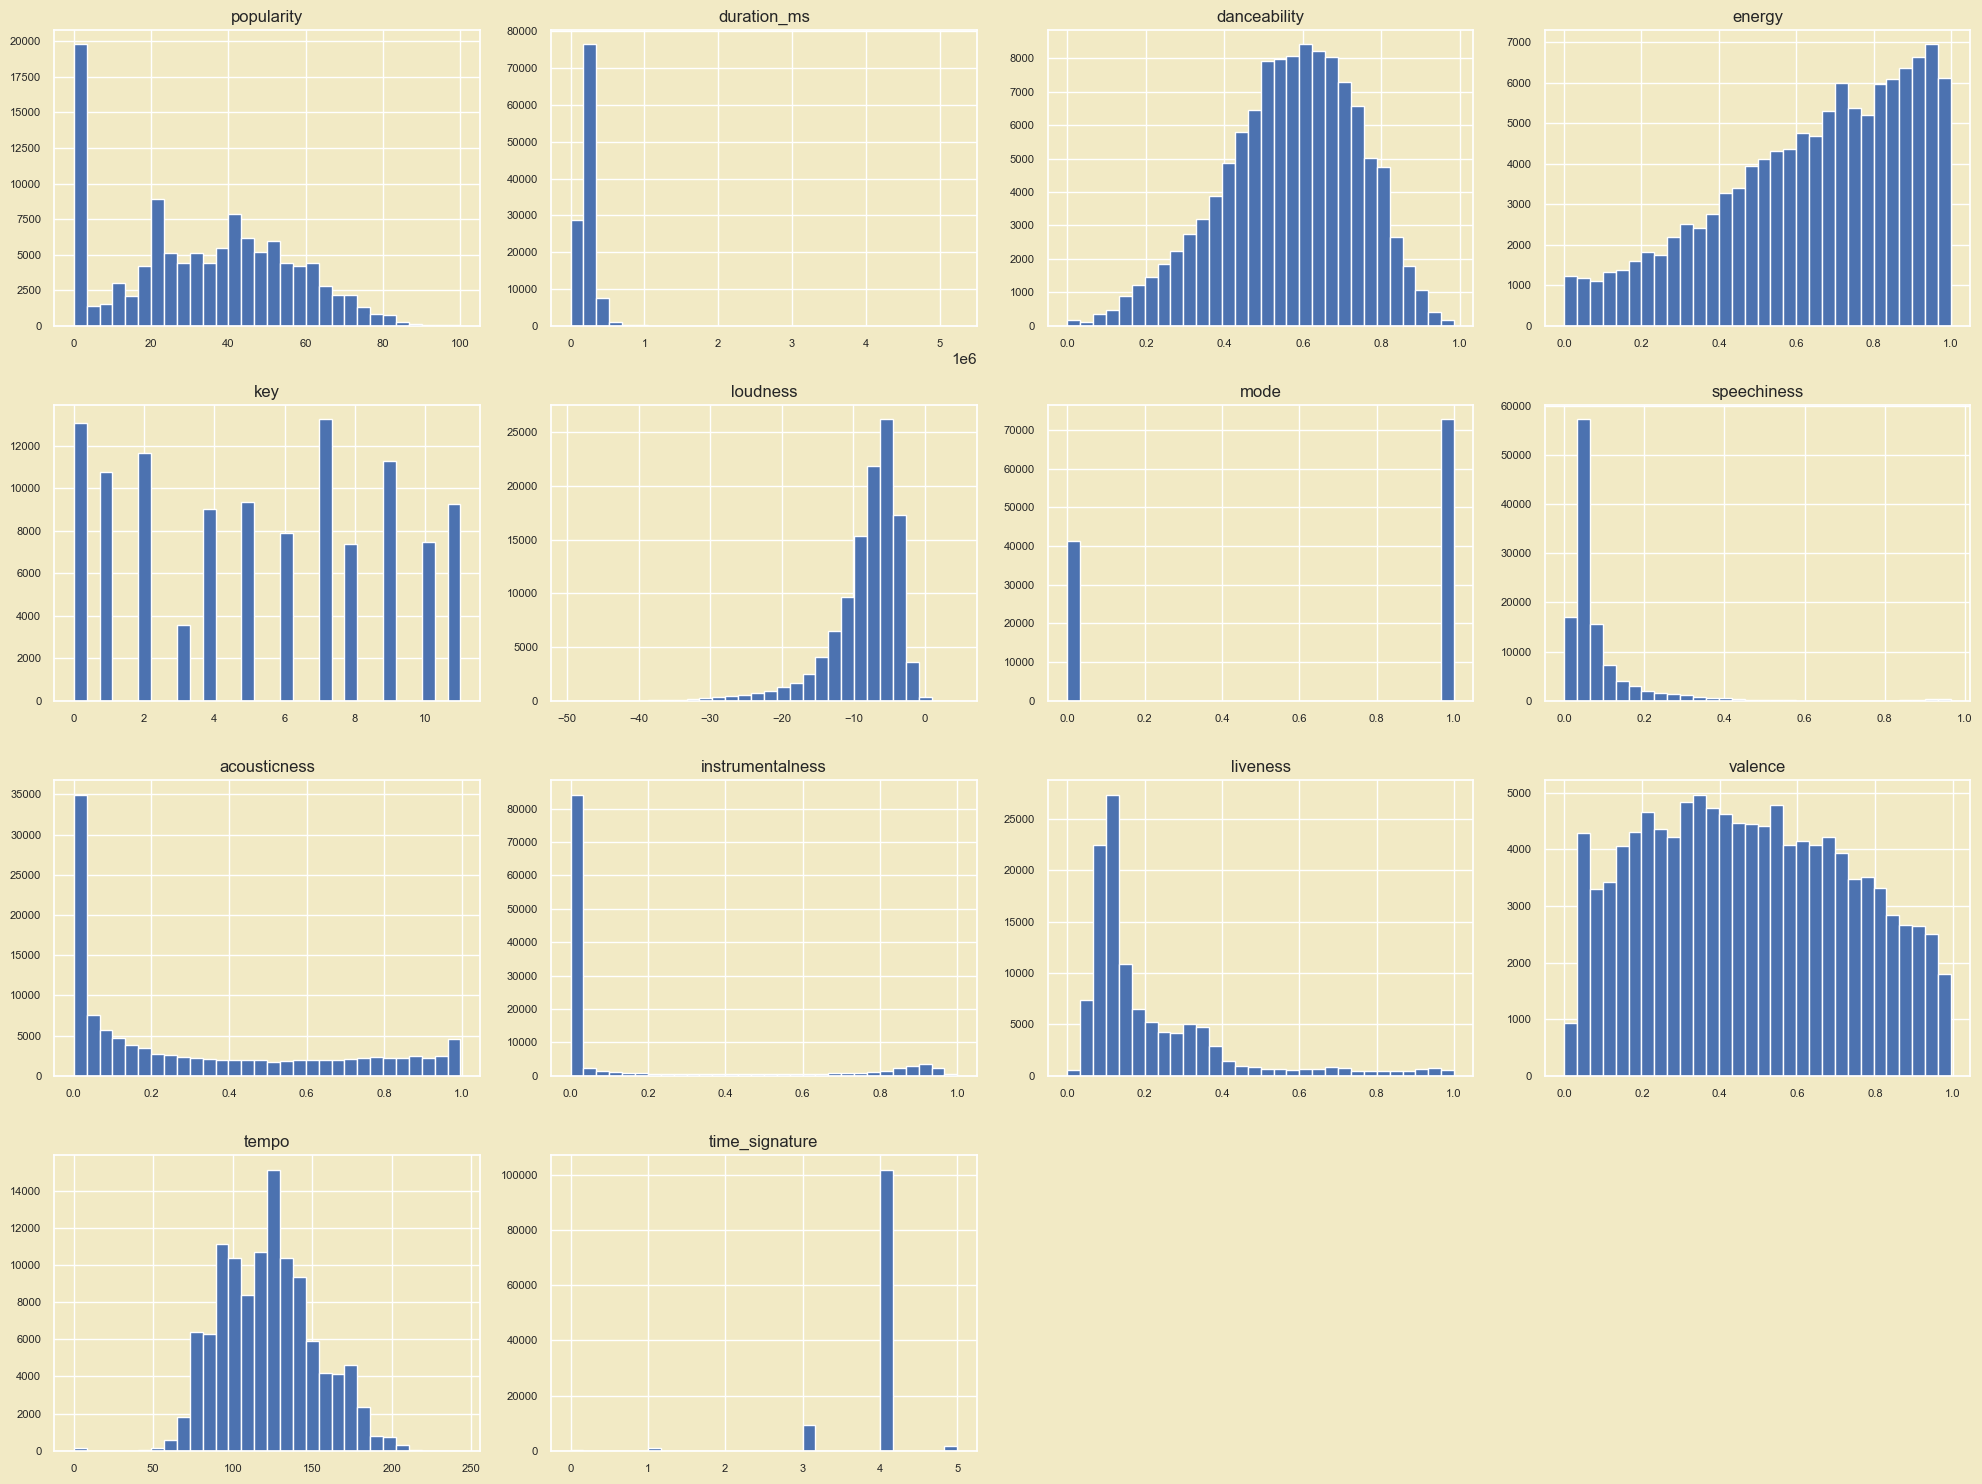

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

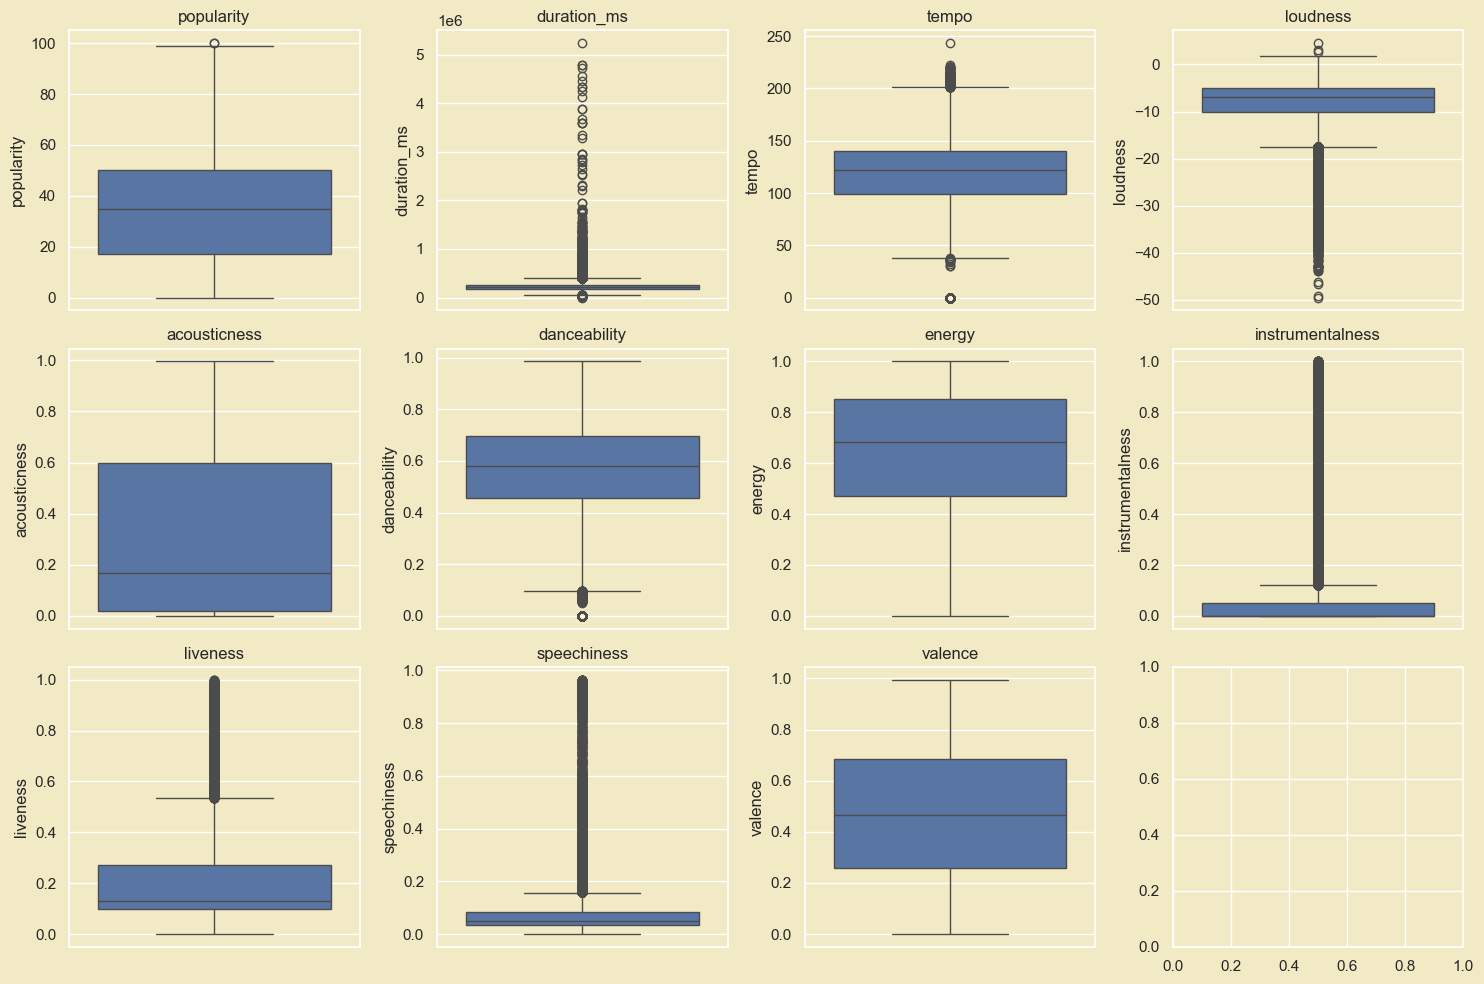

In [22]:
# boxplot for numerical columns to check for outliers
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

In [6]:
# Getting the categorical columns
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]

# Creating a summary table with column name and data type
categorical_summary = pd.DataFrame({
    'Column Name': categorical_cols.columns,
    'Data Type': categorical_cols.dtypes
}).reset_index(drop=True)

# Display the table
categorical_summary

,Column Name,Data Type
0,track_id,object
1,artists,object
2,album_name,object
3,track_name,object
4,explicit,bool
5,track_genre,object


/var/folders/s6/dkyrxyvs7sdcn4k3j2fb3pfh0000gn/T/ipykernel_35412/1114676022.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='track_genre', data=top_10_genres, palette='viridis', hue=None)


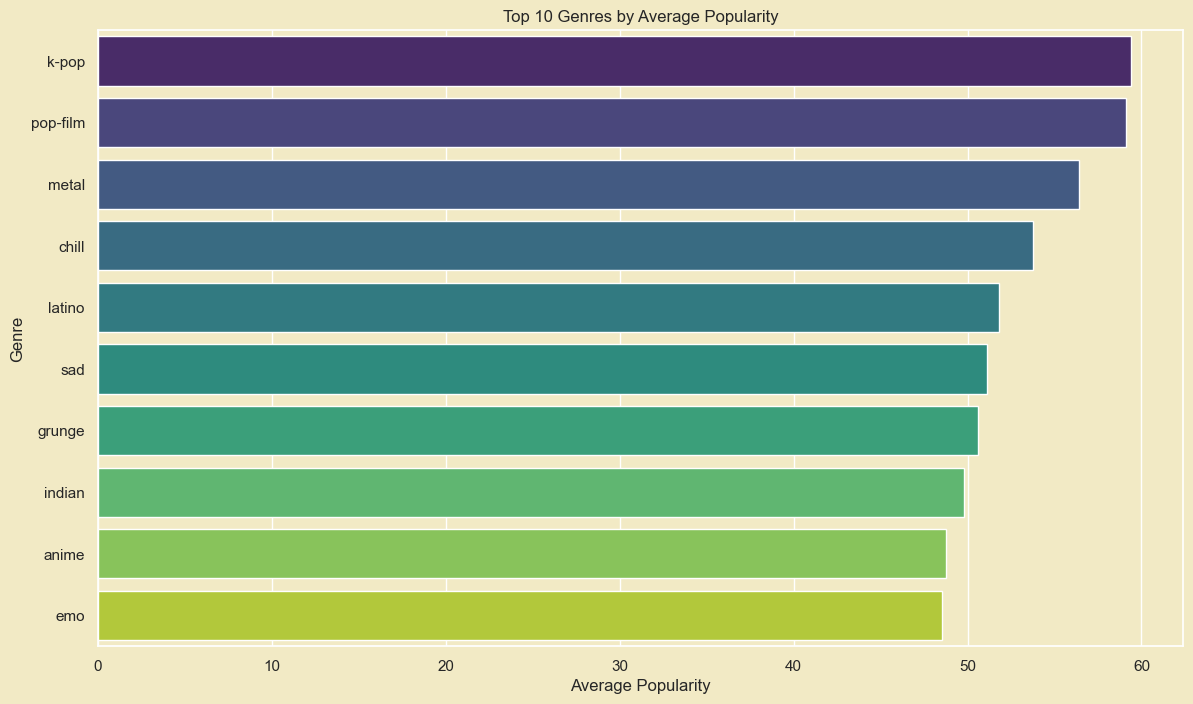

In [25]:
# Group by genre and calculate the mean popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean().reset_index()

# Sort the data by popularity in descending order
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)

# Select the top 10 genres
top_10_genres = genre_popularity.head(10)

# Create the bar plot
plt.figure(figsize=(14, 8))  # Adjust size as needed
sns.barplot(x='popularity', y='track_genre', data=top_10_genres, palette='viridis', hue=None)

# Add title and labels
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()


In [13]:
# Group by genre and calculate the mean popularity
genre_popularity = df.groupby('track_genre')['popularity'].mean()

# Find the most popular genre
most_popular_genre = genre_popularity.idxmax()
most_popular_genre_popularity = genre_popularity.max()

print(f"The most popular genre is '{most_popular_genre}' with an average popularity of {most_popular_genre_popularity:.2f}.")


The most popular genre is 'pop-film' with an average popularity of 59.28.


In [23]:
# Data Preprocessing
df = df.dropna()
df = df.drop(['time_signature', 'key'], axis=1)
df.drop_duplicates(subset=['track_id'], inplace=True)

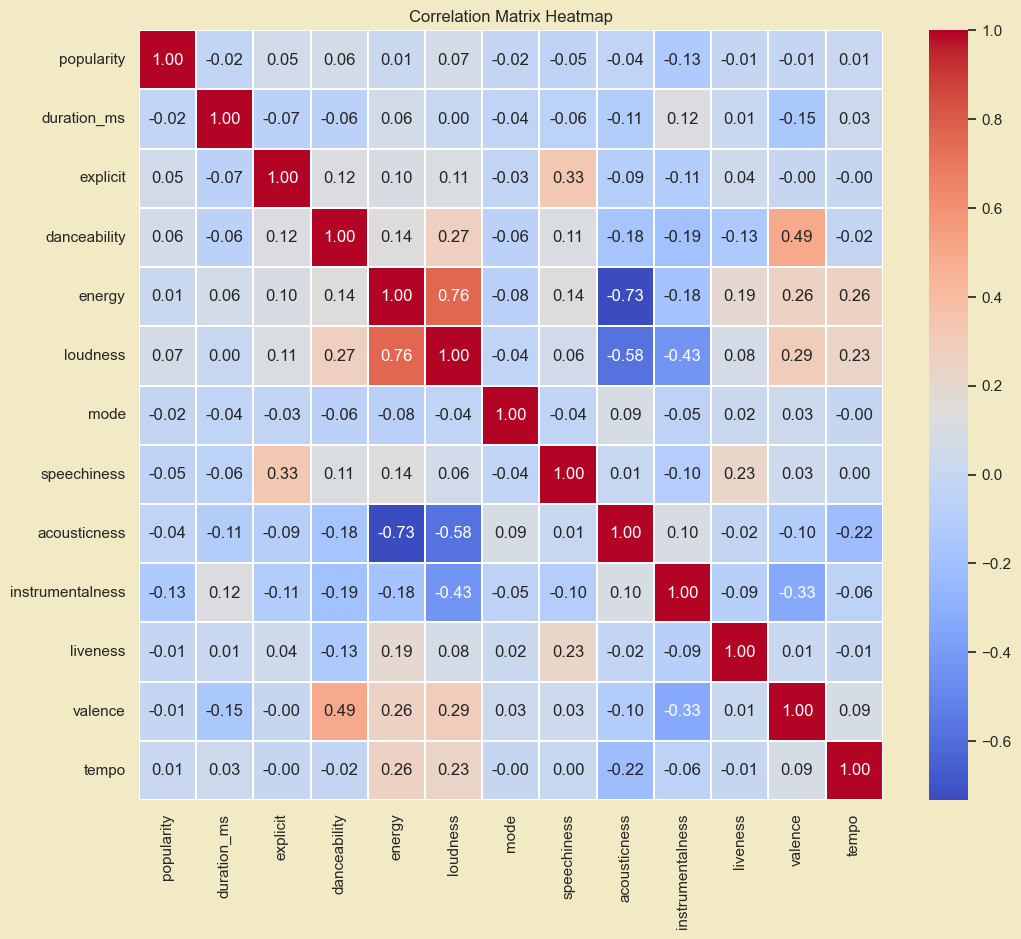

In [24]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.25)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# STATISTICAL ANALYSIS BASED ON USER RATINGS

In [1]:
import numpy as np
from scipy import stats

# Ratings data
unsupervised_ratings = np.array([
    [4, 5, 3],
    [4, 3, 5],
    [2, 2, 2],
    [4, 4, 5],
    [5, 5, 5]
])

supervised_ratings = np.array([
    [1, 0, 2],
    [2, 1, 2],
    [3, 1, 0],
    [3, 2, 3],
    [3, 1, 2]
])

# Calculate average ratings
unsupervised_avg = unsupervised_ratings.mean(axis=1)
supervised_avg = supervised_ratings.mean(axis=1)

# Paired t-test
t_stat, p_value = stats.ttest_rel(unsupervised_avg, supervised_avg)

# Variance Analysis
unsupervised_variance = np.var(unsupervised_avg)
supervised_variance = np.var(supervised_avg)

t_stat, p_value, unsupervised_variance, supervised_variance


(4.824181513244218,
 0.008497137711682685,
 1.0044444444444445,
 0.32888888888888884)